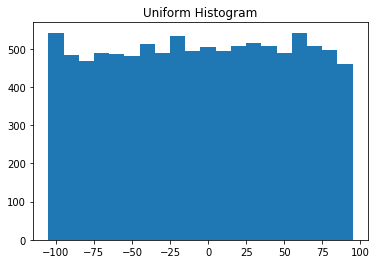

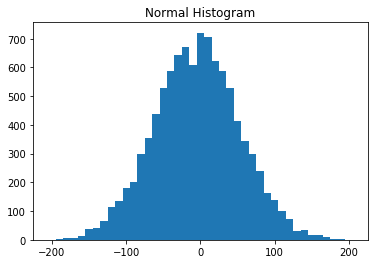

In [45]:
import math
import random
from scipy.stats import norm
from collections import Counter
from matplotlib import pyplot as plt

def bucketise(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketise(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()
    
random.seed(0)

#uniform between -100 and 100

uniform = [200*random.random() - 100 for _ in range(10000)]

#normal distribution with mean 0, standard deviation 57
normal = [57*norm.ppf(random.random()) for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

plot_histogram(normal, 10, "Normal Histogram")

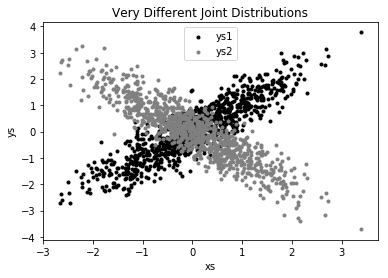

In [50]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return norm.ppf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

data = zip(xs,ys1)

In [40]:
from __future__ import division
from collections import Counter
import math

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)th entry is entry_fn(i,j)"""
    return [[entry_fn(i,j)
               for j in range(num_cols)]
               for i in range(num_rows)]

def dot(v,w):
    """dot product of v and w"""
    return sum(v_i*w_i for v_i,w_i in zip(v,w) )

def sum_of_squares(v):
    return sum(v_i**2 for v_i in v)

def mean(v):
    return sum(v)/len(v)
    
    
def median(v):
    """finds the middle-most value of v"""
    n= len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        #if odd, return the middle value
        return sorted_v[midpoint]
    
    if n % 2 == 0:
        left = sorted_v[midpoint-1]
        right = sorted_v[midpoint]
        return (left-right/2)

def quantile(x, p):
    """get the pth percentile value of x"""
    n = len(x)
    position = int(n * p)
    sorted_x = sorted(x)
    return sorted_x[position]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
           if count == max_count]

#range already means something in python, so we'll use a different name

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elts"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1) 

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x,0.75)-quantile(x,0.25)

def covariance(x,y):
    n=len(x)
    return dot(de_mean(x),de_mean(y)) / (n-1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x/ stdev_y
    else:
        return 0



X = [0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2]


print interquartile_range(X)


1


In [41]:
def shape(A):
    num_rows = len(A)
    num_columns = len(A[0]) if A else 0
    return num_rows, num_columns

def get_row(A,i):
    return A[i]

def get_column(A,i):
    return [A_i[j] for A_i in A]

#implement other statistics functions from DSFS



def correlation_matrix(data):
    """returns the num_columnss x num_columns matrix whose (i,j)th entry is 
    the correlation coefficient between columns i and j of data"""
    _, num_columns= shape(data)
    
    def matrix_entry(i,j):
        return correlation(get_column(data,i),get_column(data, j))[0]
    
    return make_matrix(get_column(data,i),get_column(data,j), matrix_entry)





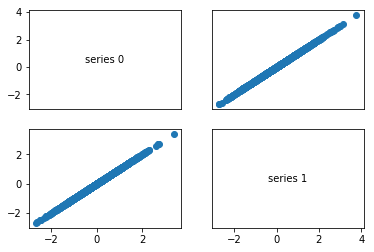

In [51]:
from matplotlib import pyplot as plt

_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        #scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data,i), get_column(data,j))
            
        #unless i == j, in which case print the aname
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                               xycoords="axes fraction",
                               ha="center", va="center")
        
        #then hide the labels on every axis except the outer left and bottom
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
        
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()
            
        

In [ ]:
import csv
import dateutil.parser
from collections import defaultdict

def parse_rows(input_row, parsers):#not clear what a parser is here
    """Given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    
    return [parser(value) if parser is not None else value for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers): #used a little later
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)
        
def try_or_none(f):
    """wraps f to return None if f raises an exception, assumes f only takes 1 input"""
    
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

def parse_row(input_row, parsers): #second attempt at a parser function, this time with safe failure for the parser
    
    return [try_or_none(parser)(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]


stock_prices = [["6/20/2014","AAPL",90.91],
                ["6/20/2014","MSFT",41.68],
                ["6/20/2014","FB",64.5],
                ["6/19/2014","AAPL",91.86],
                ["6/19/2014","MSFT",41.51],
                ["6/19/2014","FB",64.34]]

We need to process a bunch of data in csv format. Currently, the data lives in a text file and the native type of each column is not known to python. We aim to tell python what type each column of data should be at the time that the data is read in. So, we do this by wrapping the reader object with a bunch of different parsers, to create a generator that returns a format-parsed verison of a line from the csv file. We can then choose how we wish to prepare the data for further processing, e.g. as a dict or a list. A parser is here something that translates a text record into the appropriate type, e.g. Int, Date, Float, str

In [ ]:

        
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name)    #None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
    
def parse_dict(input_dict, parser_dict):
    return {field_name : try_parse_field(field_name, value, parser_dict) for field_name, value in input_dict.iteritems()}

Let's put some real data in here and start processing!

In [37]:
data=[] #list of dicts
headers = ["Date",
           "Open",
           "High",
           "Low",
           "Close",
           "Adj Close",
           "Volume"]

with open("AAPL.csv","rb") as f:
    reader = csv.reader(f)
    reader.next()
    for line in parse_rows_with(reader,[dateutil.parser.parse, float, float, float, float, float, int]):
        obs = {col_header:value for col_header,value in zip(headers,line)}
        obs["symbol"]="AAPL"
        data.append(obs)
        

with open("GOOG.csv","rb") as f:
    reader = csv.reader(f)
    reader.next()
    for line in parse_rows_with(reader,[dateutil.parser.parse, float, float, float, float, float, int]):
        obs = {col_header:value for col_header,value in zip(headers,line)}
        obs["symbol"]="GOOG"
        data.append(obs)
        
            
            

Now we want to perform operations on the parsed data, like grouping by a categorical variable and performing aggregating operations on other columns. Next is an example which computes maximums over all values of a given categorical variable.

In [59]:
#group rows by symbol
by_symbol =defaultdict(list)

for row in data:                            #add stock symbol as key,value pair to each row (which is a dict)
    by_symbol[row["symbol"]].append(row)
    
max_price_by_symbol = {symbol : max([row["Close"] for row in rows]) for symbol, rows in by_symbol.items()}

print max_price_by_symbol

By careful observation and extension of the pattern present in what we did to extract the maximum value over a set of values, we can generalise our aggregator to compute any aggregation function over categorical groupings of rows.

In [49]:
def picker(field_name):                          #e.g. get_symbol = picker("symbol") -> get_symbol(row) returns "GOOG" or "AAPL"
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]

def pluck(field_name, rows):                     #get all the corresponding values in some col for each value of a particular field_name in a bunch of lists
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)         #we set up picker as a function so we could use map here

def group_by(grouper, rows, value_transform=None):    #grouper takes a value and assigns it to a category
    #key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)   
        
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows) for key, rows in grouped.iteritems()}
    
    

In [61]:
#the part beginning lambda rows:... is pretty clever - it's an anonymous function that takes a bunch of rows and extracts 
# a list of values for a given category, then aggregates those values. Mirrors the general logic in the group_by function quite well
max_price_by_symbol2 = group_by(picker("symbol"), data, lambda rows: max(pluck("Close", rows)))


print max_price_by_symbol2


{'GOOG': 1131.97998, 'AAPL': 179.100006}


Now we want to do more complicated operations - how bout operations that compare two columns of numerical data? For example, percentage change from one day to the next.


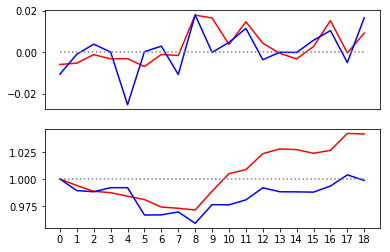

In [113]:
from matplotlib import pyplot as plt

def percent_price_change(yesterday, today):
    return today["Close"]/yesterday["Close"] - 1

def day_over_day_changes(grouped_rows):
    #sort each group
    ordered = sorted(grouped_rows,key=picker("Date"))
    
    #zip with an offset to get pairs of consecutive days, will return list of dicts
    return [{ "symbol" : today["symbol"],
              "Date" : today["Date"],
              "change" : percent_price_change(yesterday, today)} 
                for yesterday, today in zip(ordered, ordered[1:])]

# key is symbol, value is list of "change" dicts
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)

#collect all change dicts into one big list
all_changes = [change for changes in changes_by_symbol.values()
                  for change in changes]

# print all_changes
    
ys1 = group_by(picker("symbol"), all_changes, lambda rows: pluck("change",rows))["GOOG"]
ys2 = group_by(picker("symbol"), all_changes, lambda rows: pluck("change",rows))["AAPL"]
ys11 = [reduce(lambda x,y: x*(1+y), ys1[:i],1) for i,_ in enumerate(ys1)] 
ys22 = [reduce(lambda x,y: x*(1+y), ys2[:i],1) for i,_ in enumerate(ys2)] 

xs = range(len(ys1))
fig, axs = plt.subplots(2)

axs[0].plot(xs,ys1, "r")
axs[0].plot(xs,ys2, "b")
axs[0].plot(xs,[0]*len(ys1),color="grey", linestyle="dotted")
axs[0].xaxis.set_visible(False)

axs[1].plot(xs,ys11, "r")
axs[1].plot(xs,ys22, "b")
axs[1].plot(xs,[1]*len(ys1),color="grey", linestyle="dotted")
axs[1].set(xticks=xs)
plt.show()

Rescaling data

Relationships within your data can depending on the $\textit{scale}$ applied to each column. For example, in the next box we present three researchers' heights and weights. First heights are given in inches and then cm. Notice that the distance between points plotted in heightxweight space changes depending on the choice of units for height. This is not surprising, but perhaps what is surprising is that $b$'s nearest neighbour changes from $a$ to $c$!

10.7703296143 14.2842570685
22.1359436212 27.5288939117
11.401754251 13.3701159307


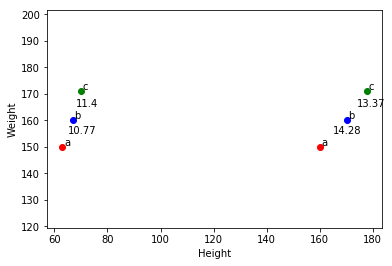

In [4]:
import math
from matplotlib import pyplot as plt
import alldsfsfuncs as me
def distance(v,w):
    """computes Euclidean distance between v and w"""
    return math.sqrt(sum((v_i-w_i)**2 for v_i,w_i in zip(v,w)))

def midpoint(v,w):
    """computes midpoint of line segment between v and w"""
    return [(v_i+w_i)/2 for v_i,w_i in zip(v,w)]

a = [63,150]
b = [67,160]
c = [70,171]

pts = [a,b,c]
styles = ["ro","bo","go"]
labels = ["a","b","c"]

a2 = [160, 150] 
b2 = [170.2, 160]
c2 = [177.8, 171]

pts2 = [a2,b2,c2]

a_to_b = distance(a,b)
a_to_c = distance(a,c)
b_to_c = distance(b,c)

a_to_b2 = distance(a2,b2)
a_to_c2 = distance(a2,c2)
b_to_c2 = distance(b2,c2)

print a_to_b, a_to_b2
print a_to_c, a_to_c2
print b_to_c, b_to_c2

#now plot them, since this is obviously a visual example

fig, axs = plt.subplots(1)



for pt,style,label in zip(pts,styles,labels):
    x,y = pt
    axs.plot(x,y,style)
    axs.annotate(label, xy = (x,y), xytext = (x+0.6,y+0.5))
    
    
for pt,style,label in zip(pts2,styles,labels):
    x,y = pt
    axs.plot(x,y,style)
    axs.annotate(label, xy = (x,y), xytext = (x+0.6,y+0.5))
    
axs.annotate(round(a_to_b,2), xy=midpoint(a,b))
axs.annotate(round(b_to_c,2), xy=midpoint(b,c))
axs.annotate(round(a_to_b2,2), xy=midpoint(a2,b2))
axs.annotate(round(b_to_c2,2), xy=midpoint(b2,c2))
    
axs.set(xlabel = "Height", ylabel = "Weight")
plt.axis("equal")

plt.show()


In [26]:
from alldsfsfuncs import dot, vector_sum

def scale(data_matrix):
    """returns the means and std devs of each column"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j)) for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j)) for j in range(num_cols)]
    return means, stdevs

def rescale(data_matrix):
    """rescales the input data so that each col has mean 0 and stdev 1. Does nothing to cols with 0 stdev"""
    def rescaled(i,j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j])/stdevs[j]
        else:
            return data_matrix[i][j]
        
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

def de_mean_matrix(A):
    """returns the result of substituting from every value of A the mean value of its column. The
    resulting matrix has mean 0 in every col"""
    nr,nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr,nc,lambda i, j: A[i][j] - column_means[j])

def magnitude(w):
    return math.sqrt(dot(w,w))

def direction(w):
    mag = magnitude(w)
    return [w_i/mag for w_i in w]

def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w. Assumes data has mean 0"""
    return dot(x_i,direction(w))**2

def directional_variance(X,w):
    """the variance of the data X in the direction of w"""
    return sum(directional_variance_i(x_i, w) for x_i in X)

def directional_variance_gradient_i(x_i,w):
    """the contribution of row x_i to the gradient of the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2*projection_length*x_ij for x_ij in x_i]

def directional_variance_gradient(X,w):
    return reduce(vector_sum,[directional_variance_gradient_i(x_i,w)
                     for x_i in X])

# def first_principle_component(X):

In [57]:
import random
import alldsfsfuncs as me
from functools import partial

random.seed(5)
x_dist = [me.inverse_normal_cdf(random.random(),0,6.5) for _ in range(200)]
y_dist = [me.inverse_normal_cdf(random.random(),0,3) + x/3 for x in x_dist]




data = zip(x_dist,y_dist)

target = partial(directional_variance,data)
grad = partial(directional_variance_gradient, data)

# grad([1,2])
pc1 =  direction(me.maximise_batch(target, grad, [1,1]))


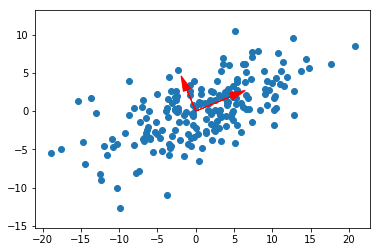

NameError: name 'p' is not defined

In [113]:
fig, axs = plt.subplots(1)

axs.scatter(x_dist,y_dist)


axs.arrow(0, 0, 5*pc1[0], 5*pc1[1],head_width=1, head_length=2, fc='r', ec='r') 
axs.arrow(0, 0, 3*pc2[0], 3*pc2[1],head_width=1, head_length=2, fc='r', ec='r')    
#no arrow visible?
plt.axis("equal")
plt.show()

p

0.923259065488 0.384177950947


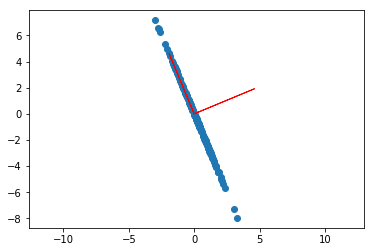

In [111]:
def remove_directional_variance_i(x_i,w):
    """remove principle component w from data point x_i"""
    return [x_ij - w_j*dot(x_i,w) for x_ij,w_j in zip(x_i,w)] #try actually writing this thing down an working it out

def remove_directional_variance(X,w):
    """remove principle component w from all data"""
    return [remove_directional_variance_i(x_i,w) for x_i in X]

data_less_pc1 = remove_directional_variance(data,pc1)
xs_pc1, ys_pc1  = zip(*data_less_pc1)


fig, axs = plt.subplots(1)

axs.scatter(xs_pc1,ys_pc1)

axs.arrow(0, 0, 5*pc1[0], 5*pc1[1], fc='r', ec='r') 
axs.arrow(0, 0, 5*pc2[0], 5*pc2[1], fc='r', ec='r') 

plt.axis("equal")
print pc1[0], pc1[1]

plt.show()

In [110]:
target = partial(directional_variance,data_less_pc1)
grad = partial(directional_variance_gradient, data_less_pc1)
pc2 =  direction(me.maximise_batch(target, grad, [1,1]))

data_less_pc2 = remove_directional_variance(data_less_pc1,pc2)

In [122]:
def get_pca_component(data):
    guess =  [1 for _ in data[0]]
    target = partial(directional_variance,data)
    grad = partial(directional_variance_gradient, data)
    component =  direction(me.maximise_batch(target, grad, guess))
    return component

def pca(data, num_components):
    components = []
    X = data
    
    for _ in range(num_components):
        component = get_pca_component(X)
        components.append(component)
        X = remove_directional_variance(X, component)
    
    return components
    
print pca(data,2)   

def change_basis(v, unit_basis):
    return [dot(v,w_i) for w_i in unit_basis]

def transform(data, unit_basis):
    return [change_basis(x_i, unit_basis) for x_i in data]



[[0.923259065488379, 0.38417795094659596], [-0.38413172220479747, 0.9232783004035005]]


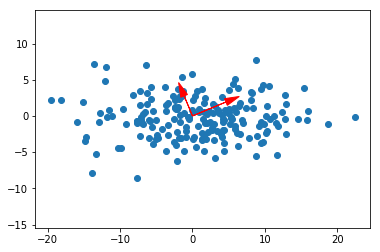

In [123]:
fig, axs = plt.subplots(1)

x_dist,y_dist = zip(*transform(data,pca(data,2)))


axs.scatter(x_dist,y_dist)


axs.arrow(0, 0, 5*pc1[0], 5*pc1[1],head_width=1, head_length=2, fc='r', ec='r') 
axs.arrow(0, 0, 3*pc2[0], 3*pc2[1],head_width=1, head_length=2, fc='r', ec='r')    
#no arrow visible?
plt.axis("equal")
plt.show()
